In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [103]:
df_1 = pd.read_csv("data/acsee_results_2023.csv")
df_2 = pd.read_csv("data/acsee_results_2024.csv")

In [104]:
df_1 = df_1[ ~df_1.gpa.isnull() ]
df_1.rename({'gpa':'prev_gpa'},axis=1,inplace=True)

In [105]:
df_2 = df_2[ ~df_2.gpa.isnull() ]

In [106]:
df_3 = pd.read_csv("project_school_performance_data(2023).csv")

In [107]:
df_3 = df_3[ ~df_3.GPA.isnull() ]
df_3.rename({'SCHOOL':'school_code','GPA':'prev_gpa','NUMBER OF CANDIDATES':'prev_enroll','SAT FOR EXAM':'prev_sat'},axis=1,inplace=True)

In [108]:
df = pd.concat([df_3.set_index('school_code'),df_2.set_index('school_code')], axis=1)

In [109]:
df.isnull().sum()

prev_enroll                 71
prev_sat                    71
SCHOOL OWNERSHIP           757
SCHOOL CATEGORY            757
SCHOOL TYPE                762
COMBINATIONS CATEGORY      769
ACADEMIC LEVEL CATEGORY    769
TOTAL PASSED CANDIDATES     71
prev_gpa                    71
school_name                 19
is_private_center           19
region                      19
gpa                         19
grade                      948
passed_candidates           19
regist                      19
absent                      19
sat                         19
withheld                    19
no-ca                       19
clean                       19
div_i                       19
div_ii                      19
div_iii                     19
div_iv                      19
div_0                       19
STUDENTS                   754
TEACHERS                   754
STUDENT-TEACHER RATIO      754
dtype: int64

In [110]:
df.columns

Index(['prev_enroll', 'prev_sat', 'SCHOOL OWNERSHIP', 'SCHOOL CATEGORY',
       'SCHOOL TYPE', 'COMBINATIONS CATEGORY', 'ACADEMIC LEVEL CATEGORY',
       'TOTAL PASSED CANDIDATES', 'prev_gpa', 'school_name',
       'is_private_center', 'region', 'gpa', 'grade', 'passed_candidates',
       'regist', 'absent', 'sat', 'withheld', 'no-ca', 'clean', 'div_i',
       'div_ii', 'div_iii', 'div_iv', 'div_0', 'STUDENTS', 'TEACHERS',
       'STUDENT-TEACHER RATIO'],
      dtype='object')

In [111]:
df = df[ ~(df.gpa.isnull() | df.prev_gpa.isnull())].drop(columns=['school_name','prev_enroll','regist','TOTAL PASSED CANDIDATES','no-ca','withheld', 'clean','absent','passed_candidates','is_private_center', 'region','grade','div_i', 'div_ii', 'div_iii', 'div_iv', 'div_0']).copy()

In [112]:
df.columns

Index(['prev_sat', 'SCHOOL OWNERSHIP', 'SCHOOL CATEGORY', 'SCHOOL TYPE',
       'COMBINATIONS CATEGORY', 'ACADEMIC LEVEL CATEGORY', 'prev_gpa', 'gpa',
       'sat', 'STUDENTS', 'TEACHERS', 'STUDENT-TEACHER RATIO'],
      dtype='object')

In [113]:
df

,prev_sat,SCHOOL OWNERSHIP,SCHOOL CATEGORY,SCHOOL TYPE,COMBINATIONS CATEGORY,ACADEMIC LEVEL CATEGORY,prev_gpa,gpa,sat,STUDENTS,TEACHERS,STUDENT-TEACHER RATIO
school_code,,,,,,,,,,,,
s0101,196.0,GOVERNMENT,BOYS ONLY,DAY AND BOARDING,MIXED,COMBINED OA,2.7577,3.0222,158.0,1515,80,19:1
s0103,467.0,NaN,NaN,NaN,NaN,NaN,2.7099,2.8265,389.0,NaN,NaN,NaN
s0104,131.0,NaN,NaN,NaN,NaN,NaN,2.7455,2.4112,122.0,NaN,NaN,NaN
s0105,169.0,NaN,NaN,NaN,NaN,NaN,2.1617,2.3932,220.0,NaN,NaN,NaN
s0106,8.0,NaN,NaN,NaN,NaN,NaN,2.7917,2.5000,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
s6064,146.0,NaN,NaN,NaN,NaN,NaN,2.8938,3.2005,217.0,NaN,NaN,NaN
s6136,15.0,NaN,NaN,NaN,NaN,NaN,3.4778,2.4889,15.0,NaN,NaN,NaN
s6209,56.0,NaN,NaN,NaN,NaN,NaN,2.8244,2.3827,54.0,NaN,NaN,NaN


In [114]:
df.isnull().sum()

prev_sat                     0
SCHOOL OWNERSHIP           675
SCHOOL CATEGORY            675
SCHOOL TYPE                680
COMBINATIONS CATEGORY      686
ACADEMIC LEVEL CATEGORY    686
prev_gpa                     0
gpa                          0
sat                          0
STUDENTS                   675
TEACHERS                   675
STUDENT-TEACHER RATIO      675
dtype: int64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, s0101 to s6249
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   prev_sat                 858 non-null    float64
 1   SCHOOL OWNERSHIP         183 non-null    object 
 2   SCHOOL CATEGORY          183 non-null    object 
 3   SCHOOL TYPE              178 non-null    object 
 4   COMBINATIONS CATEGORY    172 non-null    object 
 5   ACADEMIC LEVEL CATEGORY  172 non-null    object 
 6   prev_gpa                 858 non-null    object 
 7   gpa                      858 non-null    float64
 8   sat                      858 non-null    float64
 9   STUDENTS                 183 non-null    object 
 10  TEACHERS                 183 non-null    object 
 11  STUDENT-TEACHER RATIO    183 non-null    object 
dtypes: float64(3), object(9)
memory usage: 87.1+ KB


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Convert to integers
df['STUDENTS'] = pd.to_numeric(df['STUDENTS'], errors='coerce')
df['TEACHERS'] = pd.to_numeric(df['TEACHERS'], errors='coerce')
# Or convert to floats
df['prev_gpa'] = pd.to_numeric(df['prev_gpa'], errors='coerce')

df['student_teacher_ratio'] = (
    df['STUDENT-TEACHER RATIO']
    .str.split(':')
    .str[0]
    .apply(lambda x: x.strip() if isinstance(x, str) else x)
)

# Convert to float, coercing non-numeric values (e.g., 'Not Available') to NaN
# df['student_teacher_ratio'] = pd.to_numeric(df['student_teacher_ratio'], errors='coerce')
df['student_teacher_ratio'] = df['STUDENTS'] / df['TEACHERS']

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, s0101 to s6249
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   prev_sat                 858 non-null    float64
 1   SCHOOL OWNERSHIP         183 non-null    object 
 2   SCHOOL CATEGORY          183 non-null    object 
 3   SCHOOL TYPE              178 non-null    object 
 4   COMBINATIONS CATEGORY    172 non-null    object 
 5   ACADEMIC LEVEL CATEGORY  172 non-null    object 
 6   prev_gpa                 857 non-null    float64
 7   gpa                      858 non-null    float64
 8   sat                      858 non-null    float64
 9   STUDENTS                 178 non-null    float64
 10  TEACHERS                 178 non-null    float64
 11  STUDENT-TEACHER RATIO    183 non-null    object 
 12  student_teacher_ratio    178 non-null    float64
dtypes: float64(7), object(6)
memory usage: 93.8+ KB


In [119]:
def swap_students_teachers_if_ratio_zero(df):
    """
    Swap values in 'STUDENTS' and 'TEACHERS' columns 
    if 'student_teacher_ratio' is 0 or less.
    """
    # Ensure the column exists and is numeric
    df = df.copy()
    
    # Check for NaN or invalid values
    condition = (df['student_teacher_ratio'].fillna(0) <= 1)

    # Use .values to swap correctly
    df.loc[condition, ['STUDENTS', 'TEACHERS']] = df.loc[condition, ['TEACHERS', 'STUDENTS']].values

    return df

In [120]:
df = swap_students_teachers_if_ratio_zero(df)

In [121]:
df.describe()

,prev_sat,prev_gpa,gpa,sat,STUDENTS,TEACHERS,student_teacher_ratio
count,858.000000,857.000000,858.000000,858.000000,178.000000,178.000000,178.000000
mean,111.826340,2.636597,2.505567,117.195804,661.123596,40.022472,16.030341
std,106.742349,0.451234,0.441079,107.517609,433.651252,19.455572,5.813678
min,1.000000,1.289100,1.335700,1.000000,144.000000,10.000000,0.028302
25%,37.000000,2.357500,2.229775,40.250000,400.000000,30.000000,12.425000
50%,81.000000,2.644100,2.473650,87.000000,545.000000,35.000000,14.928571
75%,145.000000,2.893800,2.750000,153.000000,800.000000,50.000000,19.217134
max,676.000000,4.566500,4.460000,645.000000,3500.000000,115.000000,41.860465


In [122]:
df['student_teacher_ratio'] = df['STUDENTS'] / df['TEACHERS']

In [123]:
df.describe()

,prev_sat,prev_gpa,gpa,sat,STUDENTS,TEACHERS,student_teacher_ratio
count,858.000000,857.000000,858.000000,858.000000,178.000000,178.000000,178.000000
mean,111.826340,2.636597,2.505567,117.195804,661.123596,40.022472,16.451816
std,106.742349,0.451234,0.441079,107.517609,433.651252,19.455572,5.631726
min,1.000000,1.289100,1.335700,1.000000,144.000000,10.000000,8.947368
25%,37.000000,2.357500,2.229775,40.250000,400.000000,30.000000,12.500000
50%,81.000000,2.644100,2.473650,87.000000,545.000000,35.000000,15.058140
75%,145.000000,2.893800,2.750000,153.000000,800.000000,50.000000,19.933333
max,676.000000,4.566500,4.460000,645.000000,3500.000000,115.000000,41.860465


In [124]:
def studying_hours(x):
    """
    Returns studying hours with linear relationship plus normal noise.
    
    Args:
        x: Input value gpa
    
    Returns:
        Hours of studying (8*x + random noise from N(0,2))
    """
    noise = np.random.normal(loc=0, scale=4)
    return (8 * x + noise) * 5

In [125]:
def number_of_books(x):
    """
    Returns number of books using the formula: 10 * x + N(0,5)
    
    Returns:
        Number of books (30.222 + random noise from N(0,5))
    """
    noise = np.random.normal(loc=0, scale=100)
    return int(50 + 200 * x + noise)

In [126]:
def teacher_qualification(gpa):
    if gpa < 2.0:
        probs = [0.70, 0.25, 0.05]  # Basic, Intermediate, Advanced
    elif gpa <= 3.0:
        probs = [0.10, 0.70, 0.20]
    else:
        probs = [0.05, 0.25, 0.70]
    return np.random.choice(['Basic', 'Intermediate', 'Advanced'], p=probs)
# teacher_qualification = [assign_teacher_qualification(gpa) for gpa in gpa_data]

In [127]:
df['studying_hours'] = df.gpa.apply(studying_hours)
df['number_of_books'] = df.gpa.apply(number_of_books)
df['teacher_qualification'] = df.gpa.apply(teacher_qualification)

In [128]:
df

,prev_sat,SCHOOL OWNERSHIP,SCHOOL CATEGORY,SCHOOL TYPE,COMBINATIONS CATEGORY,ACADEMIC LEVEL CATEGORY,prev_gpa,gpa,sat,STUDENTS,TEACHERS,STUDENT-TEACHER RATIO,student_teacher_ratio,studying_hours,number_of_books,teacher_qualification
school_code,,,,,,,,,,,,,,,,
s0101,196.0,GOVERNMENT,BOYS ONLY,DAY AND BOARDING,MIXED,COMBINED OA,2.7577,3.0222,158.0,1515.0,80.0,19:1,18.9375,97.132930,660,Advanced
s0103,467.0,NaN,NaN,NaN,NaN,NaN,2.7099,2.8265,389.0,NaN,NaN,NaN,NaN,108.672330,641,Intermediate
s0104,131.0,NaN,NaN,NaN,NaN,NaN,2.7455,2.4112,122.0,NaN,NaN,NaN,NaN,107.607907,394,Intermediate
s0105,169.0,NaN,NaN,NaN,NaN,NaN,2.1617,2.3932,220.0,NaN,NaN,NaN,NaN,95.476595,467,Intermediate
s0106,8.0,NaN,NaN,NaN,NaN,NaN,2.7917,2.5000,4.0,NaN,NaN,NaN,NaN,102.004858,633,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s6064,146.0,NaN,NaN,NaN,NaN,NaN,2.8938,3.2005,217.0,NaN,NaN,NaN,NaN,138.150922,727,Advanced
s6136,15.0,NaN,NaN,NaN,NaN,NaN,3.4778,2.4889,15.0,NaN,NaN,NaN,NaN,81.084489,560,Basic
s6209,56.0,NaN,NaN,NaN,NaN,NaN,2.8244,2.3827,54.0,NaN,NaN,NaN,NaN,104.781522,500,Intermediate


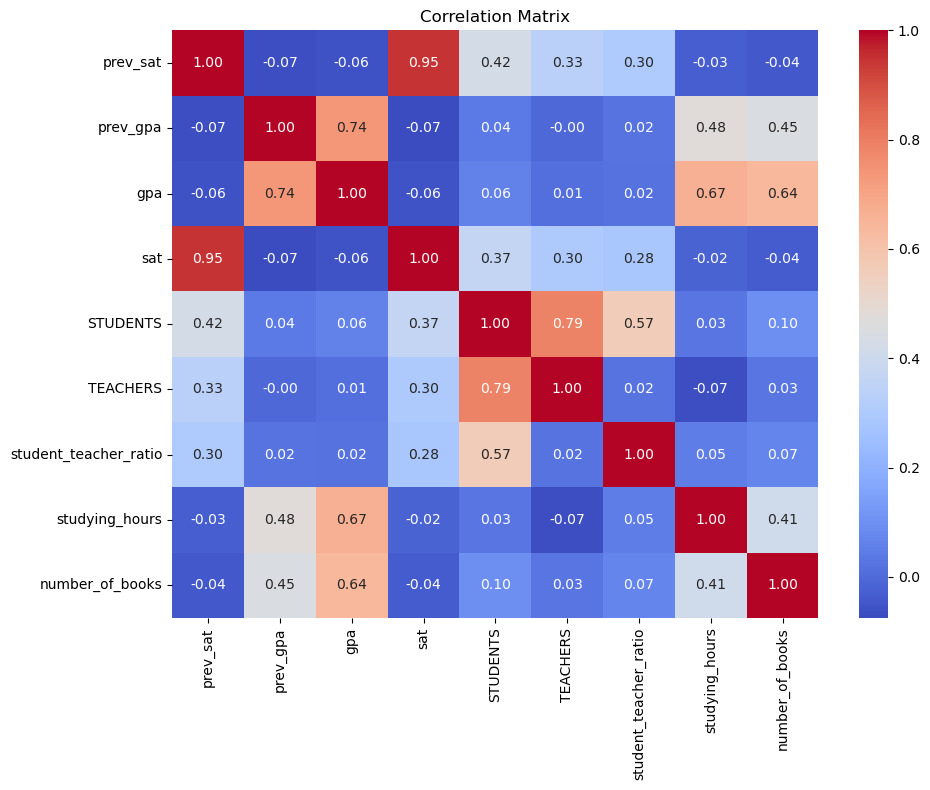

In [129]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

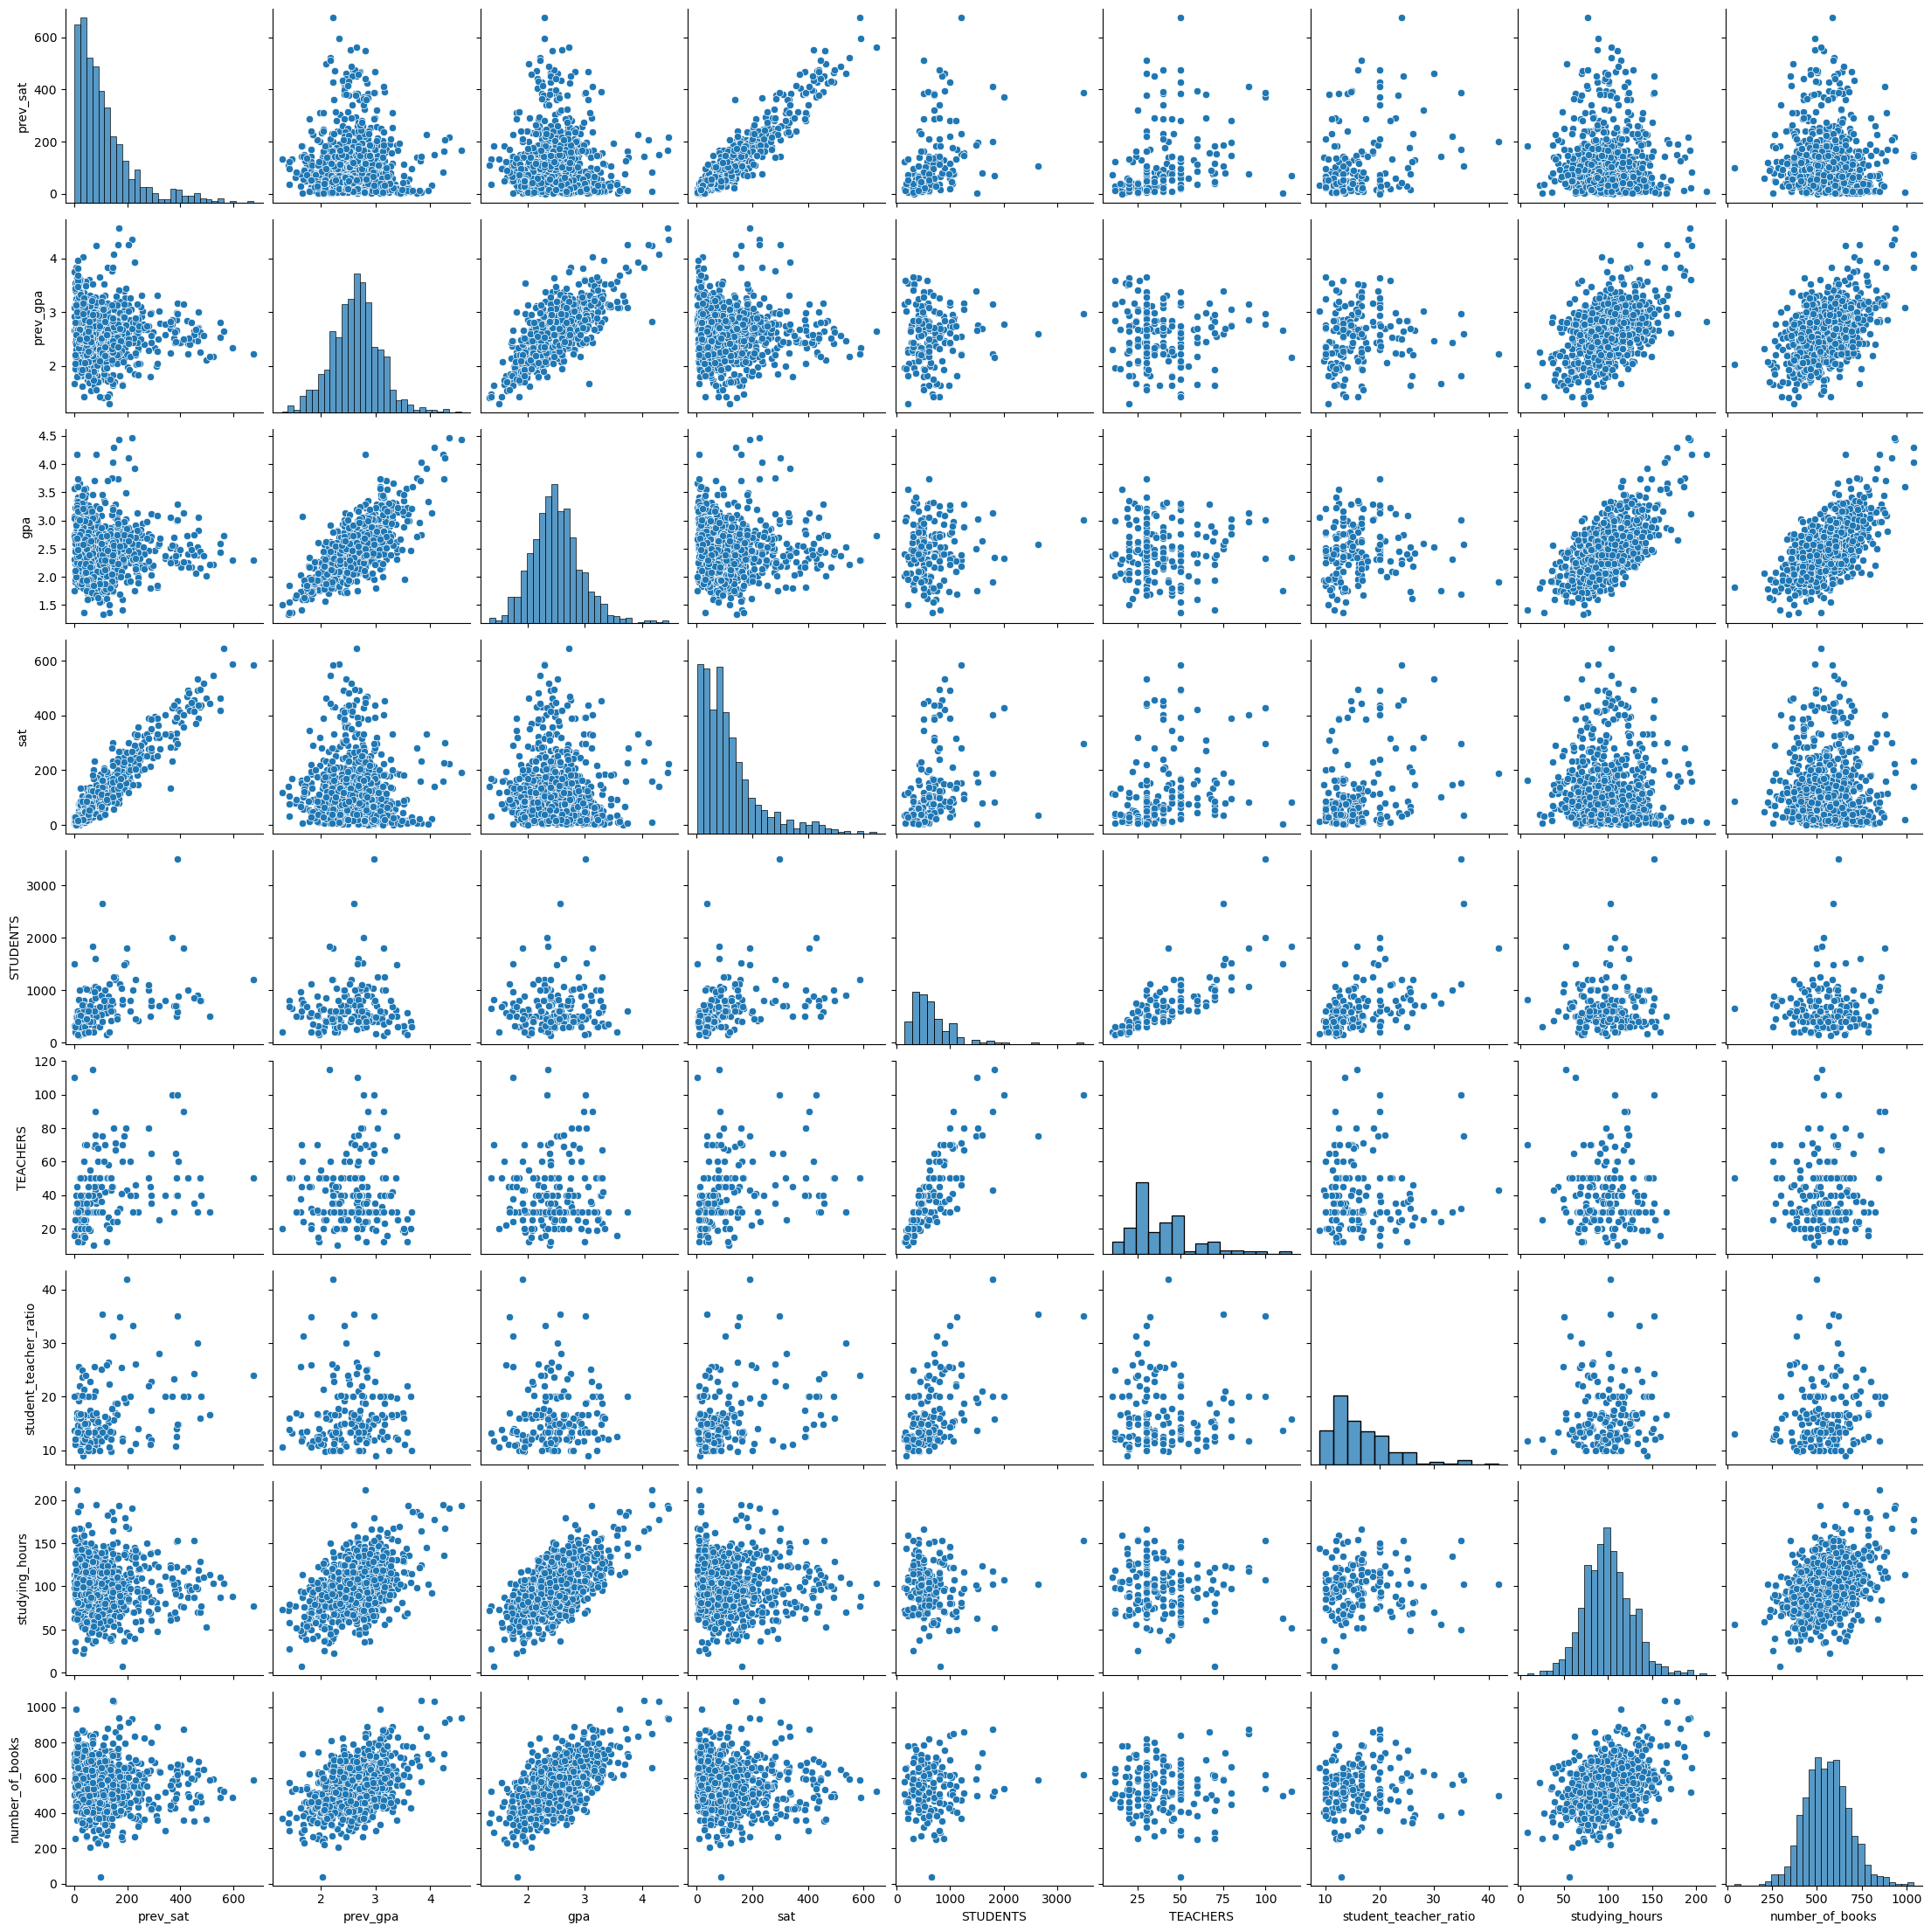

In [130]:
sns.pairplot(df)
plt.show()

In [131]:
df

,prev_sat,SCHOOL OWNERSHIP,SCHOOL CATEGORY,SCHOOL TYPE,COMBINATIONS CATEGORY,ACADEMIC LEVEL CATEGORY,prev_gpa,gpa,sat,STUDENTS,TEACHERS,STUDENT-TEACHER RATIO,student_teacher_ratio,studying_hours,number_of_books,teacher_qualification
school_code,,,,,,,,,,,,,,,,
s0101,196.0,GOVERNMENT,BOYS ONLY,DAY AND BOARDING,MIXED,COMBINED OA,2.7577,3.0222,158.0,1515.0,80.0,19:1,18.9375,97.132930,660,Advanced
s0103,467.0,NaN,NaN,NaN,NaN,NaN,2.7099,2.8265,389.0,NaN,NaN,NaN,NaN,108.672330,641,Intermediate
s0104,131.0,NaN,NaN,NaN,NaN,NaN,2.7455,2.4112,122.0,NaN,NaN,NaN,NaN,107.607907,394,Intermediate
s0105,169.0,NaN,NaN,NaN,NaN,NaN,2.1617,2.3932,220.0,NaN,NaN,NaN,NaN,95.476595,467,Intermediate
s0106,8.0,NaN,NaN,NaN,NaN,NaN,2.7917,2.5000,4.0,NaN,NaN,NaN,NaN,102.004858,633,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s6064,146.0,NaN,NaN,NaN,NaN,NaN,2.8938,3.2005,217.0,NaN,NaN,NaN,NaN,138.150922,727,Advanced
s6136,15.0,NaN,NaN,NaN,NaN,NaN,3.4778,2.4889,15.0,NaN,NaN,NaN,NaN,81.084489,560,Basic
s6209,56.0,NaN,NaN,NaN,NaN,NaN,2.8244,2.3827,54.0,NaN,NaN,NaN,NaN,104.781522,500,Intermediate


In [132]:
df = df[ ~df.student_teacher_ratio.isnull()]

In [133]:
df

,prev_sat,SCHOOL OWNERSHIP,SCHOOL CATEGORY,SCHOOL TYPE,COMBINATIONS CATEGORY,ACADEMIC LEVEL CATEGORY,prev_gpa,gpa,sat,STUDENTS,TEACHERS,STUDENT-TEACHER RATIO,student_teacher_ratio,studying_hours,number_of_books,teacher_qualification
school_code,,,,,,,,,,,,,,,,
s0101,196.0,GOVERNMENT,BOYS ONLY,DAY AND BOARDING,MIXED,COMBINED OA,2.7577,3.0222,158.0,1515.0,80.0,19:1,18.937500,97.132930,660,Advanced
s0108,280.0,GOVERNMENT,BOYS AND GIRLS,BOARDING,SCIENCE,COMBINED OA,2.7375,2.7662,390.0,1000.0,80.0,13:1,12.500000,121.301963,448,Intermediate
s0110,183.0,GOVERNMENT,BOYS ONLY,BOARDING,MIXED,COMBINED OA,1.6548,1.5956,163.0,730.0,60.0,12:1,12.166667,87.378520,253,Basic
s0113,22.0,PRIVATE,BOYS ONLY,BOARDING,MIXED,COMBINED OA,2.7576,2.7544,19.0,300.0,30.0,10:1,10.000000,94.148485,497,Intermediate
s0119,183.0,GOVERNMENT,BOYS ONLY,BOARDING,MIXED,COMBINED OA,1.6384,1.4167,162.0,820.0,70.0,12:1,11.714286,7.804424,291,Basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s5145,211.0,GOVERNMENT,BOYS AND GIRLS,BOARDING,SCIENCE,ALEVEL ONLY,3.2678,2.7089,241.0,800.0,40.0,20:1,20.000000,115.627288,459,Intermediate
s5164,45.0,PRIVATE,BOYS AND GIRLS,DAY AND BOARDING,ARTS,COMBINED OA,2.2074,1.9125,40.0,450.0,35.0,13:1,12.857143,101.652918,271,Advanced
s5184,52.0,PRIVATE,BOYS AND GIRLS,BOARDING,MIXED,COMBINED OA,2.2628,2.5497,104.0,600.0,45.0,13:1,13.333333,78.455173,517,Basic


In [134]:
df.to_csv('data/df_.csv')

In [135]:
df.describe()

,prev_sat,prev_gpa,gpa,sat,STUDENTS,TEACHERS,student_teacher_ratio,studying_hours,number_of_books
count,178.000000,177.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,113.084270,2.560664,2.456174,117.404494,661.123596,40.022472,16.451816,99.314844,538.702247
std,126.447232,0.497044,0.470863,129.341725,433.651252,19.455572,5.631726,27.599192,132.094283
min,1.000000,1.289100,1.365700,2.000000,144.000000,10.000000,8.947368,7.804424,40.000000
25%,29.250000,2.244400,2.136675,31.000000,400.000000,30.000000,12.500000,79.837082,460.250000
50%,63.000000,2.618800,2.404600,73.500000,545.000000,35.000000,15.058140,99.351690,532.500000
75%,142.250000,2.853700,2.760550,147.750000,800.000000,50.000000,19.933333,117.747282,616.750000
max,676.000000,3.654600,3.738100,585.000000,3500.000000,115.000000,41.860465,166.325219,877.000000


In [35]:
Q1 = df['student_teacher_ratio'].quantile(0.25)
Q3 = df['student_teacher_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['student_teacher_ratio'] < lower_bound) | (df['student_teacher_ratio'] > upper_bound)]


In [36]:
outliers

,prev_sat,SCHOOL OWNERSHIP,SCHOOL CATEGORY,SCHOOL TYPE,COMBINATIONS CATEGORY,ACADEMIC LEVEL CATEGORY,prev_gpa,gpa,sat,STUDENTS,TEACHERS,STUDENT-TEACHER RATIO,student_teacher_ratio,studying_hours,number_of_books,teacher_qualification
school_code,,,,,,,,,,,,,,,,
s0443,107.0,PRIVATE,BOYS AND GIRLS,DAY AND BOARDING,MIXED,COMBINED OA,2.5967,2.5725,36.0,2650.0,75.0,0:1,35.333333,24.169071,510,Intermediate
s0551,171.0,GOVERNMENT,BOYS AND GIRLS,NaN,ARTS,COMBINED OA,1.8158,1.6872,154.0,1117.0,32.0,35:1,34.906250,128.642488,505,Basic
s0681,199.0,PRIVATE,BOYS AND GIRLS,BOARDING,ARTS,COMBINED OA,2.2253,1.9127,190.0,1800.0,43.0,42:1,41.860465,2.694734,594,Intermediate
s0713,144.0,GOVERNMENT,BOYS AND GIRLS,DAY AND BOARDING,ARTS,COMBINED OA,1.6725,1.7516,104.0,750.0,24.0,31:1,31.250000,167.603526,449,Basic
s1278,220.0,PRIVATE,BOYS AND GIRLS,DAY AND BOARDING,MIXED,COMBINED OA,2.4250,2.3082,147.0,1000.0,30.0,33:1,33.333333,184.633847,668,Intermediate
s3914,389.0,PRIVATE,BOYS AND GIRLS,BOARDING,MIXED,COMBINED OA,2.9737,3.0131,297.0,3500.0,100.0,35:1,35.000000,167.500127,572,Advanced


In [41]:
Q1 = df['STUDENTS'].quantile(0.25)
Q3 = df['STUDENTS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['STUDENTS'] < lower_bound) | (df['STUDENTS'] > upper_bound)]

In [42]:
outliers

,prev_sat,SCHOOL OWNERSHIP,SCHOOL CATEGORY,SCHOOL TYPE,COMBINATIONS CATEGORY,ACADEMIC LEVEL CATEGORY,prev_gpa,gpa,sat,STUDENTS,TEACHERS,STUDENT-TEACHER RATIO,student_teacher_ratio,studying_hours,number_of_books,teacher_qualification
school_code,,,,,,,,,,,,,,,,
s0101,196.0,GOVERNMENT,BOYS ONLY,DAY AND BOARDING,MIXED,COMBINED OA,2.7577,3.0222,158.0,1515.0,80.0,19:1,18.937500,124.154289,500,Basic
s0333,370.0,GOVERNMENT,BOYS AND GIRLS,DAY AND BOARDING,MIXED,COMBINED OA,2.7766,2.3345,429.0,2000.0,100.0,20:1,20.000000,101.359407,500,Intermediate
s0345,187.0,GOVERNMENT,BOYS AND GIRLS,DAY AND BOARDING,MIXED,COMBINED OA,3.3877,2.5053,189.0,1480.0,75.0,20:1,19.733333,112.687474,500,Advanced
s0443,107.0,PRIVATE,BOYS AND GIRLS,DAY AND BOARDING,MIXED,COMBINED OA,2.5967,2.5725,36.0,2650.0,75.0,0:1,35.333333,85.948590,500,Advanced
s0534,80.0,PRIVATE,BOYS AND GIRLS,BOARDING,MIXED,COMBINED OA,2.6854,2.6337,81.0,1600.0,76.0,21:1,21.052632,103.859268,500,Advanced
s0681,199.0,PRIVATE,BOYS AND GIRLS,BOARDING,ARTS,COMBINED OA,2.2253,1.9127,190.0,1800.0,43.0,42:1,41.860465,82.723016,500,Basic
s0731,71.0,PRIVATE,BOYS AND GIRLS,DAY AND BOARDING,MIXED,COMBINED OA,2.1549,2.3476,82.0,1826.0,115.0,16:1,15.878261,89.083228,500,Intermediate
s0960,412.0,GOVERNMENT,BOYS AND GIRLS,DAY,MIXED,COMBINED OA,3.1545,3.1348,403.0,1800.0,90.0,20:1,20.000000,119.551514,500,Advanced
s1141,2.0,PRIVATE,BOYS AND GIRLS,BOARDING,MIXED,COMBINED OA,2.6667,1.7500,2.0,1500.0,110.0,14:1,13.636364,74.822312,500,Advanced


In [43]:
Q1 = df['TEACHERS'].quantile(0.25)
Q3 = df['TEACHERS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['TEACHERS'] < lower_bound) | (df['TEACHERS'] > upper_bound)]

In [44]:
outliers

,prev_sat,SCHOOL OWNERSHIP,SCHOOL CATEGORY,SCHOOL TYPE,COMBINATIONS CATEGORY,ACADEMIC LEVEL CATEGORY,prev_gpa,gpa,sat,STUDENTS,TEACHERS,STUDENT-TEACHER RATIO,student_teacher_ratio,studying_hours,number_of_books,teacher_qualification
school_code,,,,,,,,,,,,,,,,
s0333,370.0,GOVERNMENT,BOYS AND GIRLS,DAY AND BOARDING,MIXED,COMBINED OA,2.7766,2.3345,429.0,2000.0,100.0,20:1,20.000000,101.359407,500,Intermediate
s0578,78.0,PRIVATE,BOYS AND GIRLS,DAY,MIXED,COMBINED OA,2.8537,2.9797,83.0,1060.0,90.0,12:1,11.777778,109.529322,500,Intermediate
s0731,71.0,PRIVATE,BOYS AND GIRLS,DAY AND BOARDING,MIXED,COMBINED OA,2.1549,2.3476,82.0,1826.0,115.0,16:1,15.878261,89.083228,500,Intermediate
s0960,412.0,GOVERNMENT,BOYS AND GIRLS,DAY,MIXED,COMBINED OA,3.1545,3.1348,403.0,1800.0,90.0,20:1,20.000000,119.551514,500,Advanced
s1141,2.0,PRIVATE,BOYS AND GIRLS,BOARDING,MIXED,COMBINED OA,2.6667,1.7500,2.0,1500.0,110.0,14:1,13.636364,74.822312,500,Advanced
s3914,389.0,PRIVATE,BOYS AND GIRLS,BOARDING,MIXED,COMBINED OA,2.9737,3.0131,297.0,3500.0,100.0,35:1,35.000000,120.738941,500,Advanced
